In [ ]:
import pandas as pd
import numpy as np
import math
import os
import scipy.stats as stats
import sys
import random
import matplotlib.pyplot as plt
import seaborn as sns

# HomeWork 2| problem 3

Testing gender ratios (based on Rice 9.45). In a classical genetics study, Geissler (1889) studied hospital records in Saxony and compiled data on the gender ratio. The following table shows the number of male children in 6115 families having 12 children:

Let $X_1, . . . , X_{6115}$ denote the number of male children in these 6115 families.

In [5]:
obsList = np.array([7,45,181,478,829,1112,1343,1033,670,286,104,24,3])

(a)
Suggest two reasonable test statistics T1 and T2 for testing the null hypothesis
IID
$$H0 : X_1, . . . , X_{6115} ∼ Binomial(12, 0.5).$$ 
(This is intentionally open-ended; try to pick T1 and T2 to “target” different possible alter-
natives to the above null.) Compute the values of T1 and T2 for the above data.

The first statistic test T1 is the mean.

The mean of Binomial distribution B(N,p) is 
$$ mean(B(N,p)) = N\times p $$

The table gives the propability weights
 $p_{N_{kids}} = \frac{N_{kids}}{ Total_{kids} }$ 

 The mean is given by :

 $$ E[X] = \sum_{n=0}^{12} p_{i} X_i $$

 $X_{i} = N_{kids}$ 

In [12]:
probNKids

array([0.00114473, 0.00735895, 0.02959935, 0.07816844, 0.13556827,
       0.18184791, 0.21962388, 0.16892886, 0.10956664, 0.04677024,
       0.01700736, 0.00392478, 0.0004906 ])

In [18]:
probNkids=  obsList/sum(obsList)

In [22]:
DataMean =np.dot([i for i in range (13)],probNkids)
print(DataMean)

5.769419460343418


The first statistic test T2 is the Variance.

The Variance of Binomial distribution B(N,p) is 
$$ Variance(B(N,p)) = N\times p\times (1-p) $$


 The Variance is given by :

 $$ E[(n-mean)^2] = \sum_{n=0}^{12} p_{i} (n -mean)^{2} $$

 $n $= Number of kids 

In [21]:
DataVariance = np.dot([(i-DataMean)**2 for i in range (13)],probNkids)
print(DataVariance)

3.4892692459663484


(b) Perform a simulation to simulate the null distributions of T1 and T2. (For example: Simulate 6115 independent samples $X_1,...,X_{6115}$ from $Binomial(12,0.5)$, and compute T1 on this sample. Do this 1000 times to obtain 1000 simulated values of T1. Do the same for T2.) Plot the histograms of the simulated null distributions of T1 and T2. Using your simulated values, compute approximate p-values of the hypothesis tests based on T1 and T2, for the above data. For either of your tests, can you reject H0 at significance level α = 0.05? (Include both your code and the histograms with your homework submission.)

In [28]:
SampleSize=100
# Create a list of numbers from a binomial distribution
def randBinomial():
    return np.array([np.random.binomial(12,0.5) for i in range(6115)])

(array([ 2.,  9.,  6., 11., 24., 13., 15.,  9.,  7.,  4.]),
 array([5.94897792, 5.9587408 , 5.96850368, 5.97826656, 5.98802944,
        5.99779231, 6.00755519, 6.01731807, 6.02708095, 6.03684383,
        6.0466067 ]),
 <a list of 10 Patch objects>)

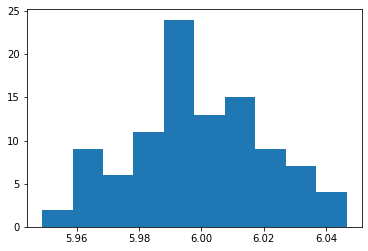

In [31]:
# computes the mean from the list generated in randT
SampleT1= np.array([ randBinomial().mean() for i in range(SampleSize)])
plt.hist(SampleT1)

(array([ 2.,  2.,  9.,  7., 18., 27., 16., 11.,  6.,  2.]),
 array([2.86362393, 2.88875552, 2.9138871 , 2.93901869, 2.96415027,
        2.98928186, 3.01441344, 3.03954502, 3.06467661, 3.08980819,
        3.11493978]),
 <a list of 10 Patch objects>)

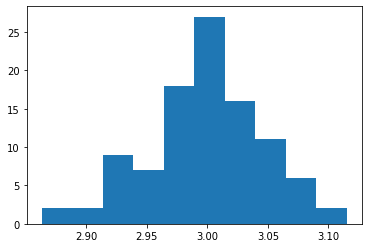

In [33]:
# computes the mean from the list generated in randT
SampleT2= np.array([ randBinomial().var() for i in range(SampleSize)])
plt.hist(SampleT2)

In [134]:
pValue1= len(SampleT1[SampleT1 < obsListMean])/1000

In [144]:
pValue2=len(SampleT2[SampleT2>obsListVar])/1000

In [145]:
pValue2

0.0